# Data Loading and Cleaning: Load the retail sales dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Retail_sales_data=pd.read_csv("/kaggle/input/eda-on-retail-sales-data/retail_sales_dataset.csv")
display(Retail_sales_data)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [2]:
Retail_sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
#Check Any Dada is null Or not 
Retail_sales_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
#Check Duplicate Value Of DataSet 
Check_duplicate=Retail_sales_data.drop_duplicates()
display(Check_duplicate)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [5]:
Cal_mean=Check_duplicate["Total Amount"].mean()
print(f"Calculate the Mean of Total Amount  {Cal_mean}")
print("---------------------------------------------")
cal_median=Check_duplicate["Total Amount"].median()
print(f"Calculate Median of  Total Amountis {cal_median}")
print("---------------------------------------------")
cal_mode=Check_duplicate["Total Amount"].mode()
print(f"Calculate Mode Of Total Amount {cal_mode}")
print("---------------------------------------------")
Cal_standard_deviation=Check_duplicate["Total Amount"].std()
print(f"Calculate the Satndard Deviation of Total Amount {Cal_standard_deviation}")

Calculate the Mean of Total Amount  456.0
---------------------------------------------
Calculate Median of  Total Amountis 135.0
---------------------------------------------
Calculate Mode Of Total Amount 0    50
Name: Total Amount, dtype: int64
---------------------------------------------
Calculate the Satndard Deviation of Total Amount 559.997631555123


# Time Series Analysis: Analyze sales trends over time using time series techniques.

In [6]:
daily_sales=Check_duplicate.groupby("Date")["Total Amount"].sum().reset_index()
display(daily_sales)

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [7]:
Check_duplicate["Date"]=pd.to_datetime(Check_duplicate["Date"])
display(Check_duplicate["Date"])

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

Text(0.5, 0, 'Total Amount')

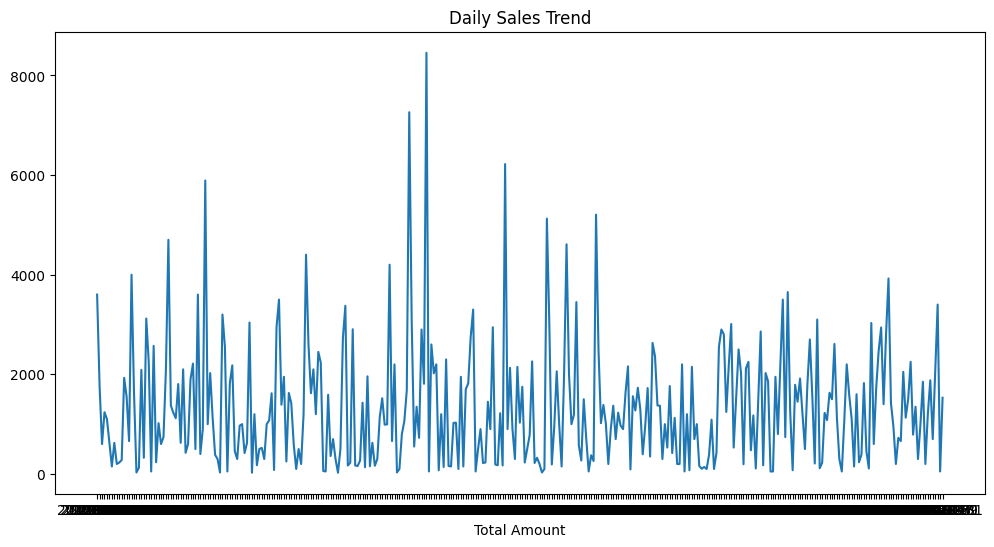

In [8]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales["Date"],daily_sales["Total Amount"])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.xlabel("Total Amount")

# Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

Gender
Female    510
Male      490
Name: count, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

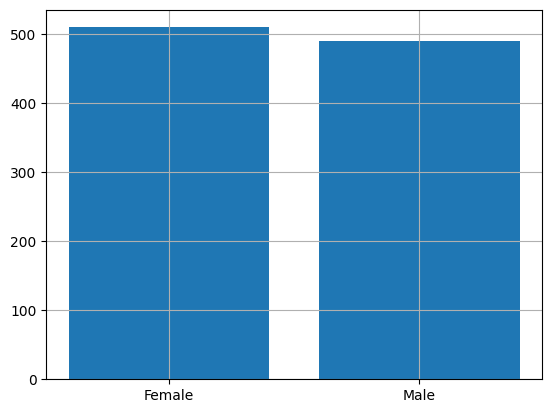

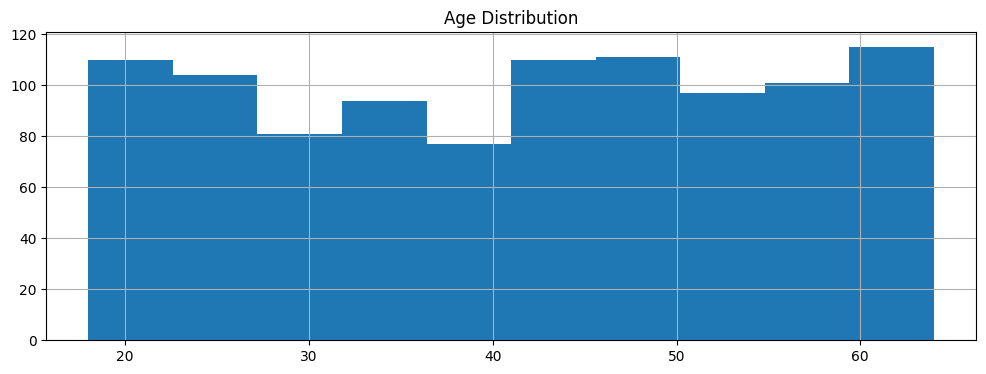

In [9]:
gender_count=Check_duplicate["Gender"].value_counts()
display(gender_count)

plt.bar(gender_count.index,gender_count.values)
plt.grid()

plt.figure(figsize=(12,4))
plt.hist(Check_duplicate["Age"])
plt.grid()
plt.title("Age Distribution")

<BarContainer object of 3 artists>

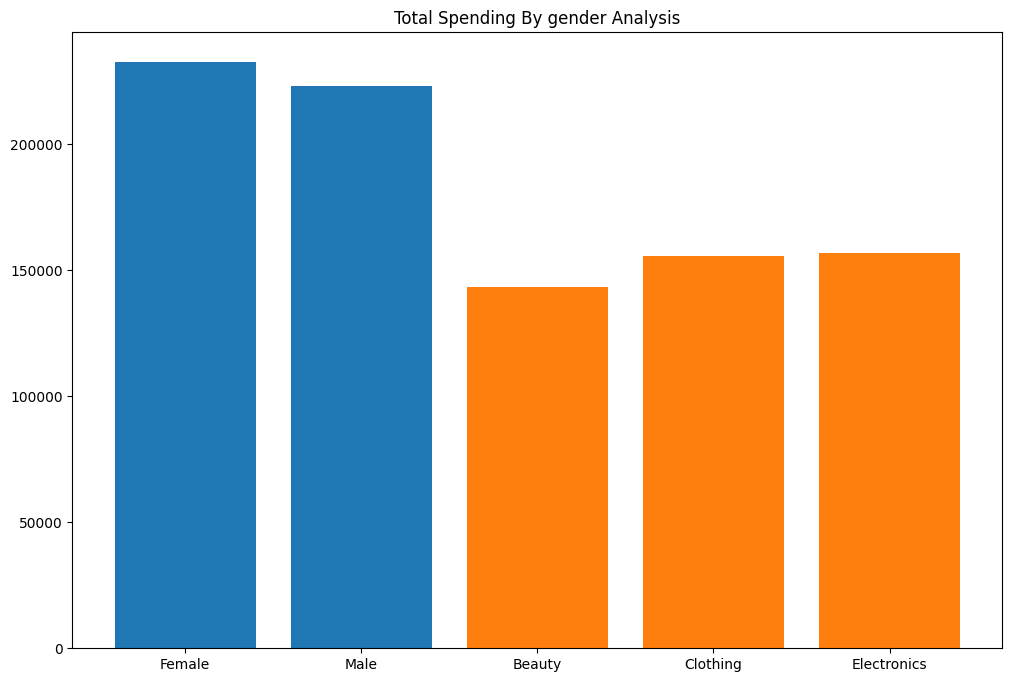

In [10]:
plt.figure(figsize=(12,8))
gender_wise_value=Check_duplicate.groupby("Gender")["Total Amount"].sum()
plt.bar(gender_wise_value.index,gender_wise_value.values)
plt.title("Total Spending By gender Analysis")


product_cat_ana=Check_duplicate.groupby("Product Category")["Total Amount"].sum()
plt.bar(product_cat_ana.index,product_cat_ana.values)


Customer ID
CUST001     150.0
CUST002    1000.0
CUST003      30.0
CUST004     500.0
CUST005     100.0
            ...  
CUST995      30.0
CUST996      50.0
CUST997      90.0
CUST998     100.0
CUST999     150.0
Name: Total Amount, Length: 1000, dtype: float64


Text(0.5, 1.0, 'Product Category With Gender  ')

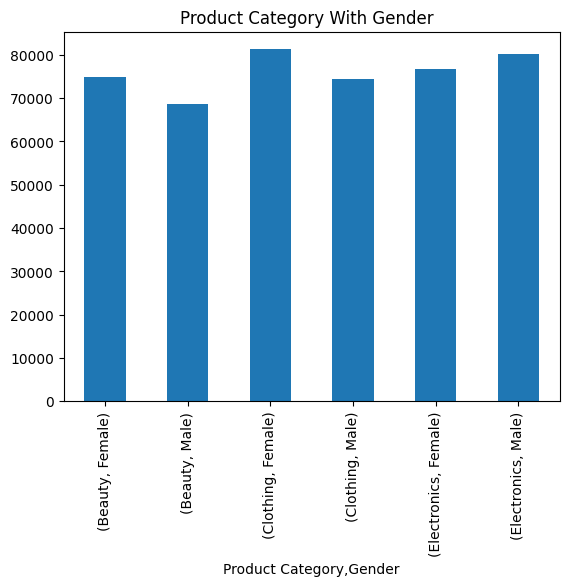

In [11]:
#display(Check_duplicate)
avg_per_catomerid=Check_duplicate.groupby("Customer ID")["Total Amount"].mean()
print(avg_per_catomerid)

product_cat_gender=Check_duplicate.groupby(["Product Category","Gender"])["Total Amount"].sum()
product_cat_gender.plot(kind="bar")
plt.title("Product Category With Gender  ")

# Explanation of the Code:
Customer Demographics Analysis:

Gender Distribution: Counts and plots the number of male and female customers using a bar chart.
Age Distribution: Creates a histogram of the age distribution, providing insights into the age ranges of the customers.
Purchasing Behavior:

Spending by Gender: This calculates and plots the total spending by male and female customers.
Spending by Product Category: This calculates and visualizes the total spending for each product category.
Average Spending per Customer: Using groupby and mean(), we find the average amount each customer spends.
Purchase Frequency: We use value_counts() to show how many times each customer has made purchases.
Cross Analysis:

Spending by Product Category and Gender: The groupby method combined with unstack() gives a breakdown of spending by gender for each product category. This is then visualized using a stacked bar chart.
Insights:
Customer Demographics:

The gender distribution shows which gender forms the majority of customers.
The age distribution provides insights into which age groups are more active customers.
Purchasing Behavior:

The total spending analysis reveals which gender or product categories generate the most revenue.
Average spending and purchase frequency can help identify high-value customers or frequent buyers.
Cross Analysis:

The cross-analysis between product categories and gender helps reveal specific product preferences for different genders.
Conclusion:
This approach helps you uncover customer demographics and purchasing behavior using simple and effective data analysis techniques. You can adjust the code for larger datasets or additional factors to further explore customer behavior. Let me know if you'd like additional enhancements or analysis!

# Visualization: Present insights through bar charts, line plots, and heatmaps.

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

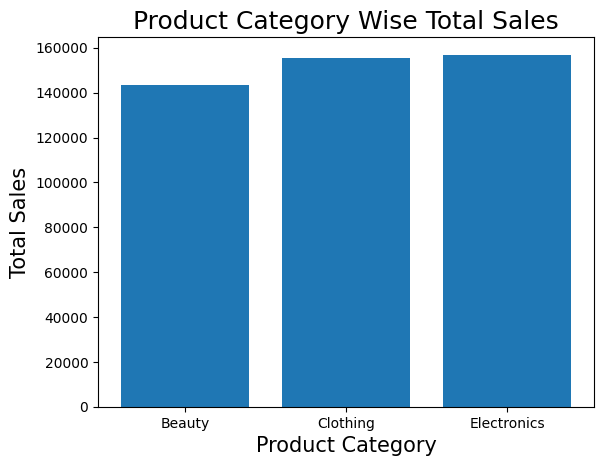

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

display(Check_duplicate)
sales_c=Check_duplicate.groupby("Product Category")["Total Amount"].sum().sort_values()
display(sales_c)

plt.bar(sales_c.index,sales_c.values)
#sns.barplot(x=sales_c.index, y=sales_c.values)
plt.title("Product Category Wise Total Sales",size="18")
plt.xlabel("Product Category",size="15")
plt.ylabel("Total Sales",size="15")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


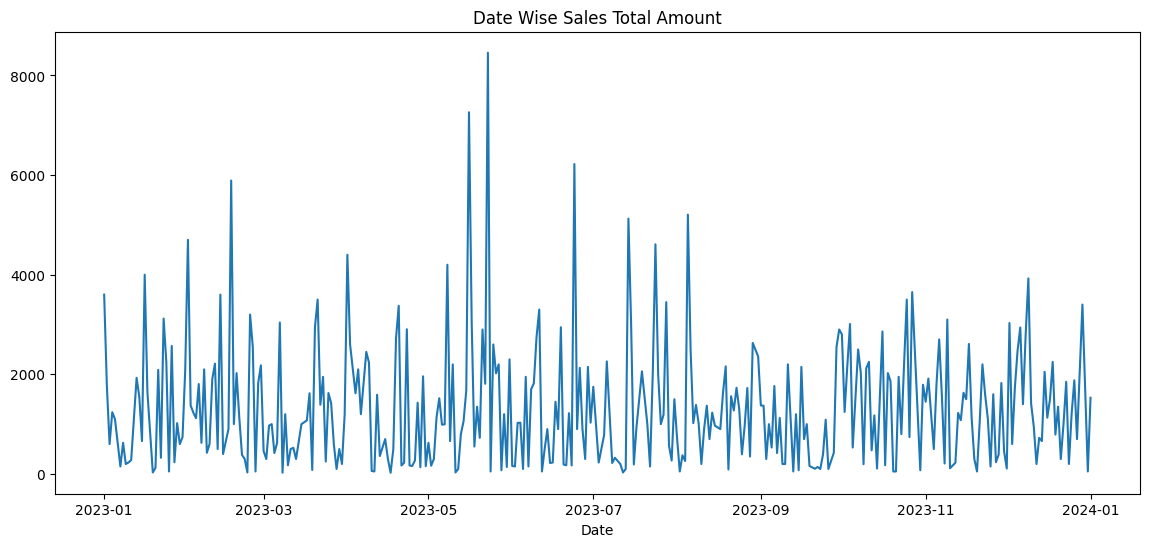

In [13]:
line_date_sale=Check_duplicate.groupby("Date")["Total Amount"].sum()
plt.figure(figsize=(14,6))
sns.lineplot(x=line_date_sale.index,y=line_date_sale.values)
plt.title("Date Wise Sales Total Amount")
plt.show()

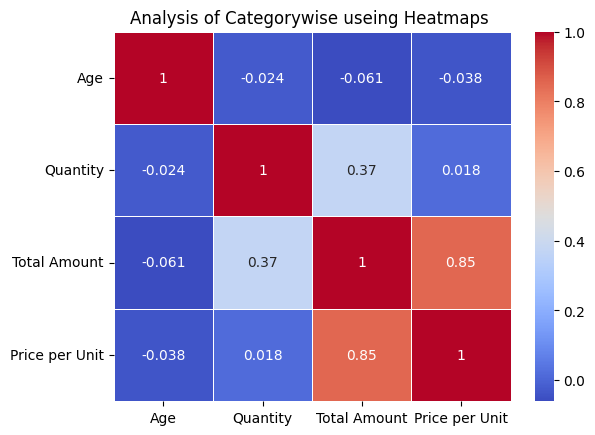

In [14]:
co_r=Check_duplicate[["Age","Quantity","Total Amount","Price per Unit"]].corr()
sns.heatmap(co_r,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title("Analysis of Categorywise useing Heatmaps ")
plt.show()

# **Recommendations: Provide actionable recommendations based on the EDA.**

# # Focus on increasing sales for the Clothing category
# # gender-based marketing strategies
# # CRM system 